# Data Description: List of features

X: Longitude coordinate for squirrel sighting point

Y: Latitude coordinate for squirrel sighting point

Unique Squirrel ID: Identification tag for each squirrel sightings. The tag is comprised of "Hectare ID" + "Shift" + "Date" + "Hectare Squirrel Number."

Hectare: ID tag, which is derived from the hectare grid used to divide and count the park area. One axis that runs predominantly north-to-south is numerical (1-42), and the axis that runs predominantly east-to-west is roman characters (A-I).

Shift: Value is either "AM" or "PM," to communicate whether or not the sighting session occurred in the morning or late afternoon.

Date: Concatenation of the sighting session day and month.

Hectare Squirrel Number: Number within the chronological sequence of squirrel sightings for a discrete sighting session.

Age: Value is either "Adult" or "Juvenile."

Primary Fur Color: Value is either "Gray," "Cinnamon" or "Black."

Highlight Fur Color: Discrete value or string values comprised of "Gray," "Cinnamon" or "Black."

Combination of Primary and Highlight Color: A combination of the previous two columns; this column gives the total permutations of primary and highlight colors observed.

Color notes: Sighters occasionally added commentary on the squirrel fur conditions. These notes are provided here.

Location: Value is either "Ground Plane" or "Above Ground." Sighters were instructed to indicate the location of where the squirrel was when first sighted.

Above Ground Sighter Measurement: For squirrel sightings on the ground plane, fields were populated with a value of “FALSE.”

Specific Location: Sighters occasionally added commentary on the squirrel location. These notes are provided here.

Running: Squirrel was seen running.

Chasing: Squirrel was seen chasing another squirrel.

Climbing: Squirrel was seen climbing a tree or other environmental landmark.

Eating: Squirrel was seen eating.

Foraging: Squirrel was seen foraging for food.

Other Activities	

Kuks: Squirrel was heard kukking, a chirpy vocal communication used for a variety of reasons.

Quaas: Squirrel was heard quaaing, an elongated vocal communication which can indicate the presence of a ground predator such as a dog.

Moans: Squirrel was heard moaning, a high-pitched vocal communication which can indicate the presence of an air predator such as a hawk.

Tail flags: Squirrel was seen flagging its tail. Flagging is a whipping motion used to exaggerate squirrel's size and confuse rivals or predators. Looks as if the squirrel is scribbling with tail into the air.

Tail twitches: Squirrel was seen twitching its tail. Looks like a wave running through the tail, like a breakdancer doing the arm wave. Often used to communicate interest, curiosity.

Approaches: Squirrel was seen approaching human, seeking food.

Indifferent: Squirrel was indifferent to human presence.

Runs from: Squirrel was seen running from humans, seeing them as a threat.

Other Interactions: Sighter notes on other types of interactions between squirrels and humans.

Lat/Long: Latitude and longitude

# Objectives

- Exploration and data analysis (EDA) in order to answer the first question: how do squirrels interact with each other and with humans?

- Cluster the squirrels and analyze the reason for their division into the different clusters.

- Train a classifier based on the squirrels' friendliness towards humans (approach) or their enmity (runs from them). Analyze the main factors behind these two behaviors.

# Workplan

To achieve the objectives, we will first explore the data, identifying if there are any abnormalities, such as errors or outliers, analyzing the existing missing values ​​and the correlation between the different features. Once this exploration has been carried out, we must decide if it is useful to create new features from the current ones (feature engineering) and determine which features we should finally keep (feature selection). Once this phase is finished, we will cluster the squirrels and we will analyze which features are most important for each of the clusters. In order to visualize and increase the separability between clusters, we will use some dimensionality reduction method such as UMAP. Finally, we will analyze what factors are behind the friendly or unfriendly interaction with humans, for which we will train a classifier with the friendly class (based on the features "Approaches" and "Run from"). We will determine if the classifier has been able to learn adequately based on cross validation and which features have been the most important for the classifier. 

# Exploratory Data Analysis

We start by importing the libraries and loading the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTEENN
import seaborn as sns
import umap
import shap

df=pd.read_csv('data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
df

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466)
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973)
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883)
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912)


We take a look at the possible values that different features can take.

In [2]:
cols=df.columns.tolist()
for i in range(len(cols)):
    print(df[cols[i]].value_counts())

-73.960883    1
-73.974337    1
-73.979559    1
-73.967762    1
-73.970551    1
             ..
-73.958836    1
-73.953287    1
-73.971758    1
-73.958968    1
-73.961565    1
Name: X, Length: 3023, dtype: int64
40.791156    1
40.771494    1
40.794422    1
40.766558    1
40.778528    1
            ..
40.774106    1
40.788576    1
40.766860    1
40.779008    1
40.766095    1
Name: Y, Length: 3023, dtype: int64
37E-PM-1006-03    2
7D-PM-1010-01     2
40B-AM-1019-06    2
4C-PM-1010-05     2
1F-AM-1010-04     2
                 ..
37C-AM-1012-04    1
12E-AM-1017-07    1
6H-AM-1008-01     1
36F-PM-1012-03    1
38D-AM-1017-04    1
Name: Unique Squirrel ID, Length: 3018, dtype: int64
14D    32
32E    30
14E    28
01B    27
07H    26
       ..
18E     1
30F     1
05H     1
29I     1
24I     1
Name: Hectare, Length: 339, dtype: int64
PM    1676
AM    1347
Name: Shift, dtype: int64
10132018    434
10072018    405
10142018    368
10062018    337
10102018    335
10082018    285
10122018    218
101

Thanks to showing the different values of the features we can see the following:
- The Unique Squirrel ID field is not really unique.
- The records are only from a few days of the month of October 2018.
- The maximum value of squirrels observed at the same time, Hectare Squirrel Number, is 23.
- The features that correspond to the annotations of the observers take very different values, as expected.
- Lat/Long is a simple combination of X and Y.

Subsequently, we analyze the percentage of missing values for each feature:

In [3]:
print('Ratio of missing values for each feature:')
for i in range(len(cols)):
    print(cols[i]+':'+str(round(df[cols[i]].isnull().sum()/len(df)*100,3))+'%')

Ratio of missing values for each feature:
X:0.0%
Y:0.0%
Unique Squirrel ID:0.0%
Hectare:0.0%
Shift:0.0%
Date:0.0%
Hectare Squirrel Number:0.0%
Age:4.003%
Primary Fur Color:1.819%
Highlight Fur Color:35.925%
Combination of Primary and Highlight Color:0.0%
Color notes:93.979%
Location:2.117%
Above Ground Sighter Measurement:3.771%
Specific Location:84.254%
Running:0.0%
Chasing:0.0%
Climbing:0.0%
Eating:0.0%
Foraging:0.0%
Other Activities:85.544%
Kuks:0.0%
Quaas:0.0%
Moans:0.0%
Tail flags:0.0%
Tail twitches:0.0%
Approaches:0.0%
Indifferent:0.0%
Runs from:0.0%
Other Interactions:92.061%
Lat/Long:0.0%


We observe that the features of the observer annotations are practically empty. In addition, the Highlight Fur Color feature has a considerable amount of missing values, so this feature and the one created from it, Combination of Primary and Highlight Color, will not have much relevance.

Just as we analyzed the amount of missing values per feature, now we will look if there is any row that contains more than 33% missing values:

In [4]:
for i in range(len(df)):
    ratio=df.loc[i].isnull().sum()/len(cols)*100
    if ratio>33:
        print('The row '+str(i)+' has a ratio of missing values of'+str(round(ratio,3))+'%')

There is no row with more than a third of missing values, so we do not have to decide whether to delete any for this reason.

However, we must analyze the cases in which we have the ID of the squirrel replicated. In particular, it is necessary to see how the replicated cases differ, since they could be observations of the same squirrel on different days, places, etc.

In [5]:
num=df['Unique Squirrel ID'].value_counts().values
ids=df['Unique Squirrel ID'].value_counts().index
rep_ids=ids[np.where(num==2)[0]]
for i in range(len(rep_ids)):
    indx=df.index[df['Unique Squirrel ID']==rep_ids[i]]
    print('\nDifferences between rows '+str(indx[0])+' and '+str(indx[1])+':')
    for j in range(len(cols)):
        if df[cols[j]][indx[0]]!=df[cols[j]][indx[1]] and pd.notna(df[cols[j]][indx[0]]) and pd.notna(df[cols[j]][indx[1]]):
            print(cols[j])
            print(df[cols[j]][indx[0]])
            print(df[cols[j]][indx[1]])


Differences between rows 104 and 2271:
X
-73.9570437717691
-73.9569670900695
Y
40.7948509408039
40.7948792856813
Lat/Long
POINT (-73.9570437717691 40.794850940803904)
POINT (-73.9569670900695 40.794879285681304)

Differences between rows 517 and 2234:
X
-73.97494466297059
-73.9748522796455
Y
40.77206596960671
40.771958662100296
Lat/Long
POINT (-73.9749446629706 40.7720659696067)
POINT (-73.9748522796455 40.7719586621003)

Differences between rows 1540 and 2167:
X
-73.957710975899
-73.95823634371351
Y
40.79840556140471
40.7987752300505
Lat/Long
POINT (-73.957710975899 40.7984055614047)
POINT (-73.9582363437135 40.7987752300505)

Differences between rows 2106 and 2888:
X
-73.9772624834791
-73.9771646835311
Y
40.769282191854295
40.769304916508396
Lat/Long
POINT (-73.9772624834791 40.7692821918543)
POINT (-73.9771646835311 40.7693049165084)

Differences between rows 2532 and 2613:
X
-73.9766195697096
-73.9765877920583
Y
40.766190726154704
40.7660946071574
Lat/Long
POINT (-73.9766195697096

The differences between the duplicates are based on the values of X and Y and, therefore, also for Lat/Long. In addition, the difference between these values is small, so since they are not observations of the same squirrel at different times and situations, we proceed to eliminate the duplicates.

In [6]:
for i in range(len(rep_ids)):
    indx=df.index[df['Unique Squirrel ID']==rep_ids[i]]
    df.drop(indx[1], inplace=True)
df.reset_index(drop=True, inplace=True)

# Feature engineering

Once we have a preliminary analysis of the data, it is time to think about whether we can introduce new features that may be useful to us based on the data we already have. My proposals for new features are the following:
- 'Hectare' contains 2 values, a numerical value between 1 and 42 that gives us the North-South location and a character between A and I that gives us the West-East location. This feature can be divided into 2 new features 'NS zone' and 'WE zone' which in turn simplify the information already contained by 'X', 'Y' and 'Lat/Long'.
- 'Hectare Squirrel Number' gives us information on the number of squirrels observed at the same time. However, these numerical values are not really relevants for us and, perhaps, it is convinient to convert it into a categorical variable, dividing the cases into lonely squirrels, squirrels in small groups (2-10 individuals) and squirrels in big groups (>10 individuals).
- 'Date' provides information on the day, month and year, but only varies in terms of days, so it might be better to replace it with a new feature, 'Day'.

In [7]:
#NS and WE zone
df.insert(df.columns.get_loc('Hectare')+1, 'WE-Zone', df['Hectare'].map(lambda x: x[2]))
df.insert(df.columns.get_loc('Hectare')+1, 'NS-Zone', df['Hectare'].map(lambda x: x[0:2]).astype(int))

#Squirrel Group Size
sq_number=df['Hectare Squirrel Number'].to_numpy(dtype ='int')
sq_number[np.where(sq_number==1)[0]]=1
sq_number[np.where((sq_number >1) & (sq_number<=10))[0]]=2
sq_number[np.where(sq_number >10)[0]]=3
df.insert (df.columns.get_loc('Hectare Squirrel Number')+1, 'Squirrel Group Size', sq_number)
df.replace({'Squirrel Group Size': {0:'Unknown', 1:'Lonely', 2:'Small group', 3:'Big group'}}, inplace=True)

#Day
df.insert(df.columns.get_loc('Date')+1, 'Day', df['Date'].astype(str).map(lambda x: x[2:4]).astype(int))
df

,X,Y,Unique Squirrel ID,Hectare,NS-Zone,WE-Zone,Shift,Date,Day,Hectare Squirrel Number,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,37,F,PM,10142018,14,2,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,21,B,AM,10192018,19,2,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,11,B,PM,10142018,14,2,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,32,E,PM,10172018,17,3,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,13,E,AM,10172018,17,2,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,-73.963943,40.790868,30B-AM-1007-04,30B,30,B,AM,10072018,7,2,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466)
3014,-73.970402,40.782560,19A-PM-1013-05,19A,19,A,PM,10132018,13,2,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973)
3015,-73.966587,40.783678,22D-PM-1012-07,22D,22,D,PM,10122018,12,2,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883)
3016,-73.963994,40.789915,29B-PM-1010-02,29B,29,B,PM,10102018,10,2,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912)


# Feature selection

Once we have created the new featues it is necessary to eliminate those that they are going to replace. In addition, it is necessary to eliminate those features that we already mentioned had too many missing values and were going to be irrelevant.

In [8]:
df=df.drop(columns=['X','Y','Unique Squirrel ID','Hectare','Date','Hectare Squirrel Number','Highlight Fur Color', 'Combination of Primary and Highlight Color','Color notes','Specific Location','Other Activities','Other Interactions','Lat/Long'])
df

,NS-Zone,WE-Zone,Shift,Day,Squirrel Group Size,Age,Primary Fur Color,Location,Above Ground Sighter Measurement,Running,...,Eating,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from
0,37,F,PM,14,Small group,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,21,B,AM,19,Small group,NaN,NaN,NaN,NaN,False,...,False,False,False,False,False,False,False,False,False,False
2,11,B,PM,14,Small group,NaN,Gray,Above Ground,10,False,...,False,False,False,False,False,False,False,False,False,False
3,32,E,PM,17,Big group,Adult,Gray,NaN,NaN,False,...,True,True,False,False,False,False,False,False,False,True
4,13,E,AM,17,Small group,Adult,Gray,Above Ground,NaN,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,30,B,AM,7,Small group,Adult,Gray,Ground Plane,FALSE,False,...,True,True,False,False,False,False,False,False,False,True
3014,19,A,PM,13,Small group,Adult,Gray,Ground Plane,FALSE,False,...,False,True,False,False,False,False,False,False,True,False
3015,22,D,PM,12,Small group,Adult,Gray,Ground Plane,FALSE,False,...,True,True,False,False,False,False,False,False,True,False
3016,29,B,PM,10,Small group,NaN,Gray,Ground Plane,FALSE,False,...,True,False,False,False,False,False,False,False,True,False


Once these features are eliminated, we are going to convert the categorical and boolean features into numeric ones by encoding them. This will be useful both for analyzing the correlation between features and later for clustering and classifying the data.

In [9]:
no_num_cols=np.concatenate([np.arange(1,3),np.arange(4,len(df.columns))])
df.iloc[:,no_num_cols]=df.iloc[:,no_num_cols].astype(str).apply(preprocessing.LabelEncoder().fit_transform)
df

,NS-Zone,WE-Zone,Shift,Day,Squirrel Group Size,Age,Primary Fur Color,Location,Above Ground Sighter Measurement,Running,...,Eating,Foraging,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from
0,37,5,1,14,2,3,3,2,41,0,...,0,0,0,0,0,0,0,0,0,0
1,21,1,0,19,2,3,3,2,41,0,...,0,0,0,0,0,0,0,0,0,0
2,11,1,1,14,2,3,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,32,4,1,17,0,1,2,2,41,0,...,1,1,0,0,0,0,0,0,0,1
4,13,4,0,17,2,1,2,0,41,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,30,1,0,7,2,1,2,1,40,0,...,1,1,0,0,0,0,0,0,0,1
3014,19,0,1,13,2,1,2,1,40,0,...,0,1,0,0,0,0,0,0,1,0
3015,22,3,1,12,2,1,2,1,40,0,...,1,1,0,0,0,0,0,0,1,0
3016,29,1,1,10,2,3,2,1,40,0,...,1,0,0,0,0,0,0,0,1,0


Once the data has been transformed, we are going to calculate the correlation matrix to see the relationship between the features. Specifically, we will be interested in those pairs of features that have a high correlation (positive or negative) since in such cases we will be interested in removing one of them.

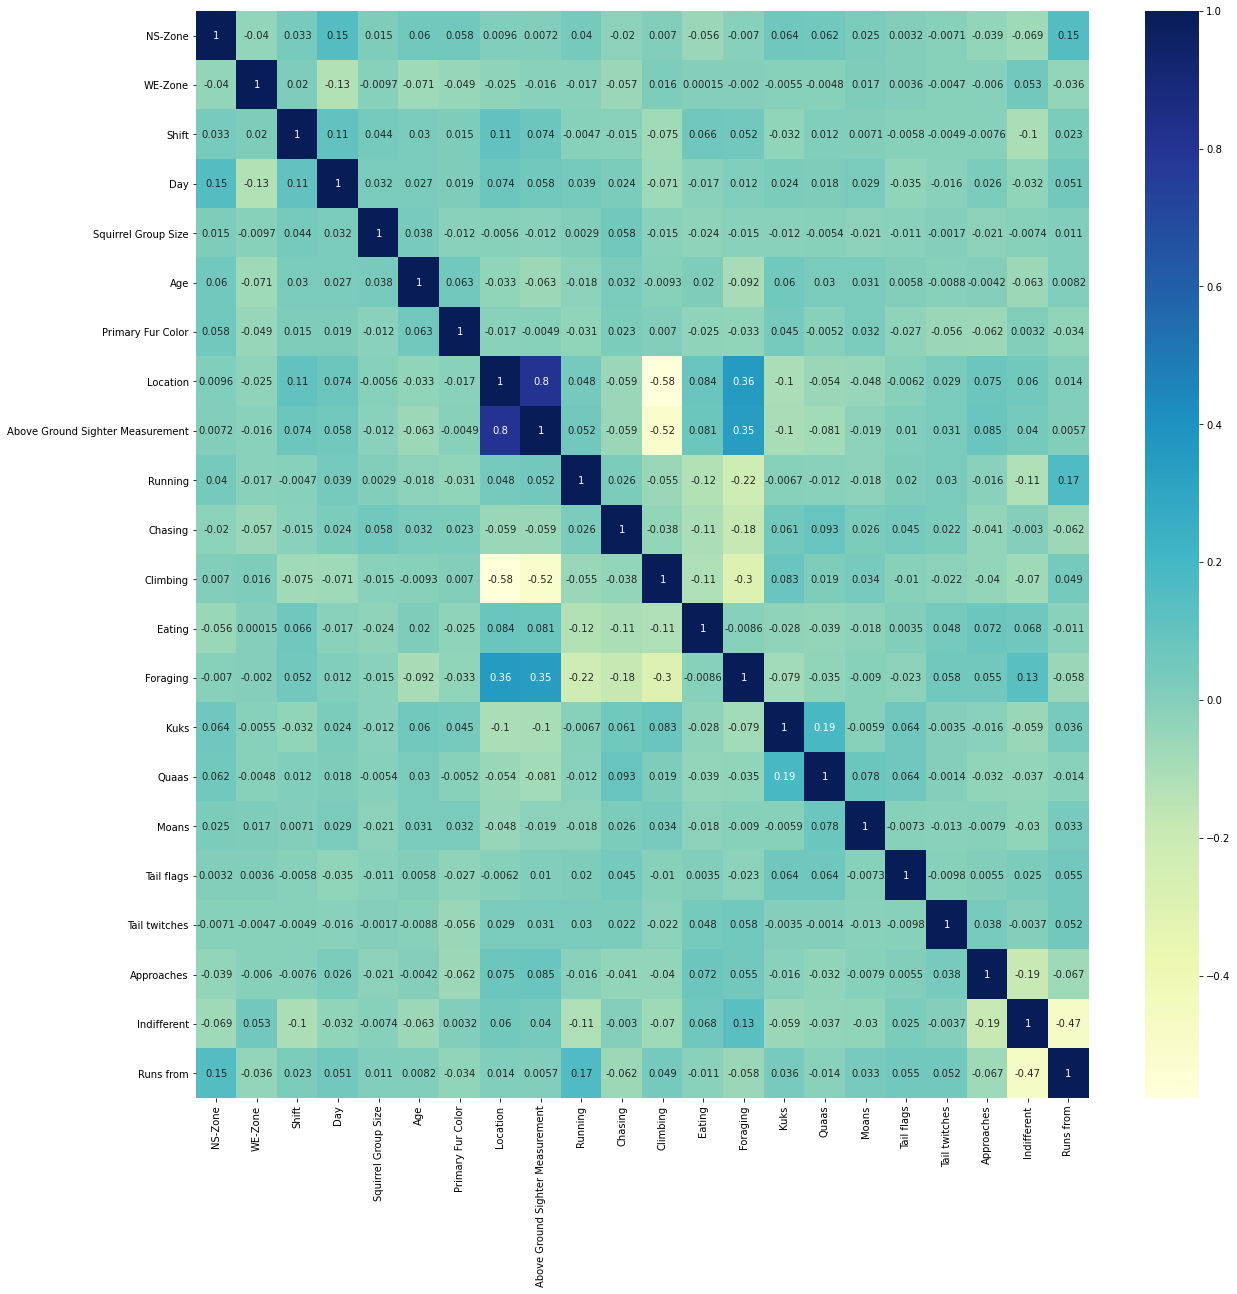

In [10]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(20, 20))
sns.heatmap(corrmat,annot=True, cmap ="YlGnBu")
plt.show()

We see that 'Location' and 'Above Ground Sighter Measurement' are closely correlated and since 'Location' provides clearer information, we keep this one.

In [11]:
df=df.drop(columns=['Above Ground Sighter Measurement'])

Finally, we are going to visualize the histograms of the remaining features. This can be useful to see, in the case of numerical variables (NS Zone, Day), if there are outliers.

Features histograms


<Figure size 432x288 with 0 Axes>

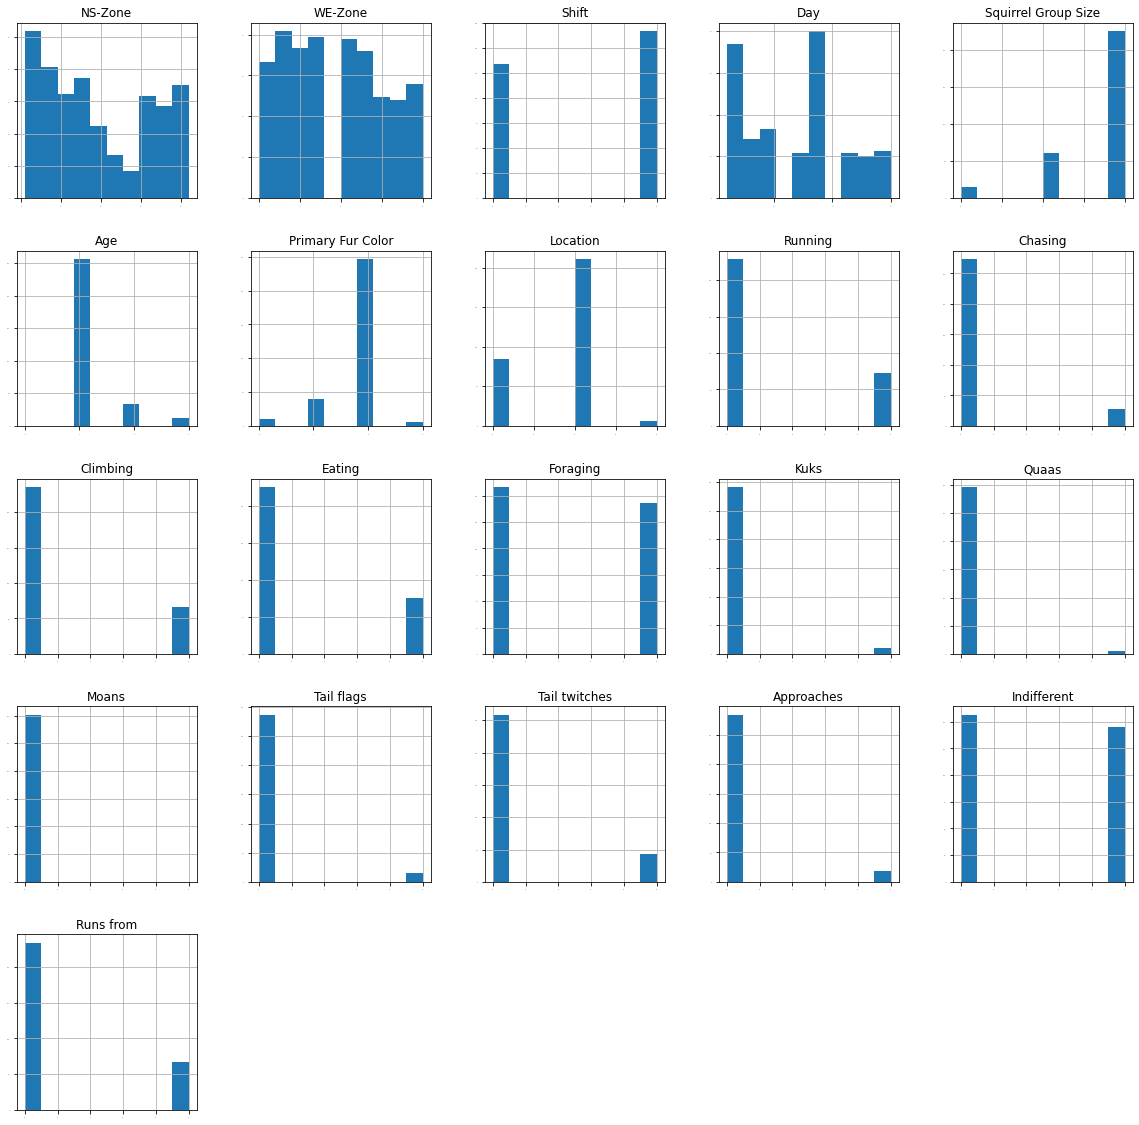

In [12]:
print('Features histograms')
plt.figure()
df.hist(xlabelsize=0.5, ylabelsize=0.2,figsize =(20, 20))
plt.xlabel('Data')
plt.show()

Because there are no outliers, there is no need to remove any more rows from our dataframe.

# Observation information

First of all, we are going to see in which areas of Central Park the squirrels have been observed, how the different observations are distributed on the map and how the observations are distributed throughout the days (depending on morning and afternoon).

In [13]:
NScoords=np.arange(1,43)
WEcoords=['A','B','C','D','E','F','G','H','I']
NYmap_obs=np.zeros((len(NScoords),len(WEcoords)))
for i in range(len(df)):
    NYmap_obs[df['NS-Zone'][i]-1,df['WE-Zone'][i]]+=1
NYmap=NYmap_obs>=1
NYmap=NYmap.astype(int)

We first visualize in which areas of Central Park the squirrels have been observed (white boxes).

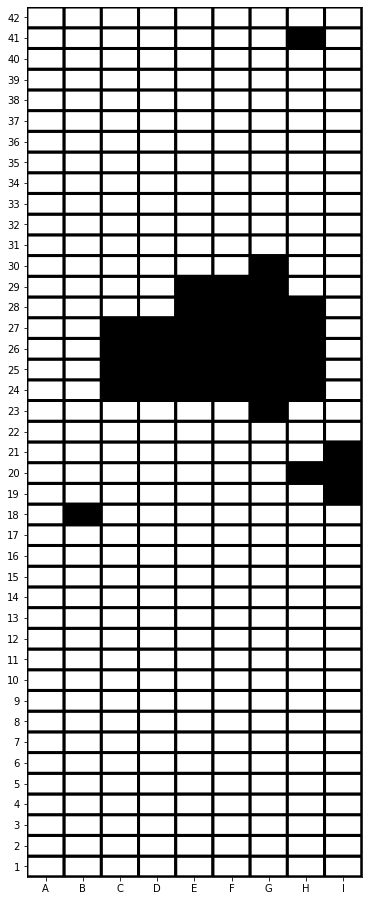

In [14]:
cmap = colors.ListedColormap(['black','white'])
plt.figure(figsize=(6,16))
plt.pcolor(NYmap,cmap=cmap,edgecolors='k', linewidths=3)
plt.xticks(np.arange(0.5,len(WEcoords)+0.5,step=1),WEcoords)
plt.yticks(np.arange(0.5,len(NScoords)+0.5,step=1),NScoords)
plt.show()

We visualize with a heat map how the observations are distributed in the previous map.

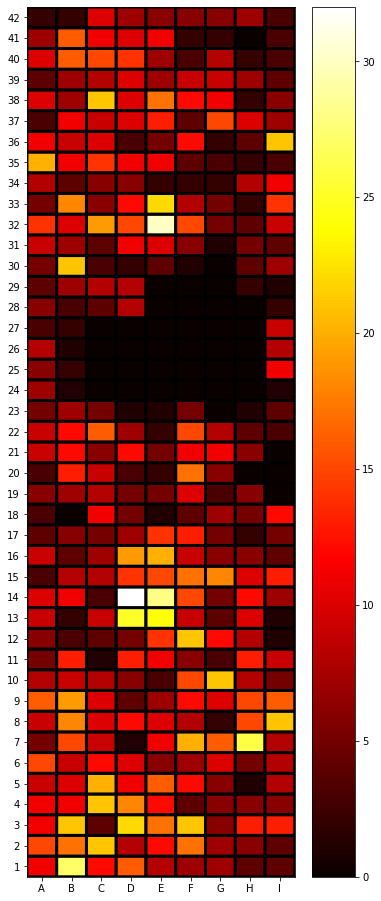

In [15]:
plt.figure(figsize=(6,16))
plt.pcolor(NYmap_obs,cmap='hot',edgecolors='k', linewidths=3)
plt.xticks(np.arange(0.5,len(WEcoords)+0.5,step=1),WEcoords)
plt.yticks(np.arange(0.5,len(NScoords)+0.5,step=1),NScoords)
plt.colorbar()
plt.show()

Finally, we are going to see how the observations are distributed throughout the days (depending on morning and afternoon).

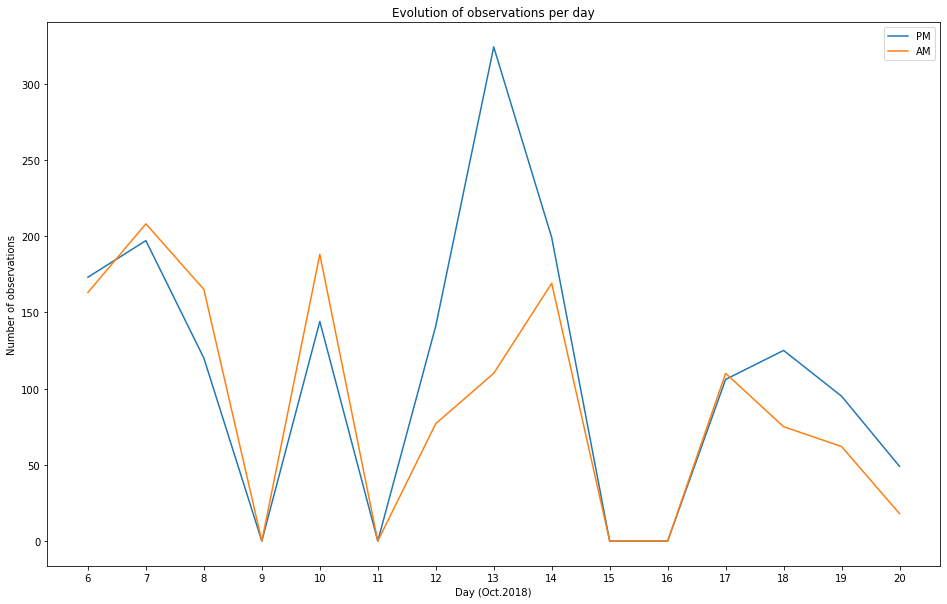

In [16]:
l_days=np.arange(df['Day'].min(),df['Day'].max()+1)
l_shift=df['Shift'].value_counts().index.tolist()
n_observ=np.zeros((len(l_days),len(l_shift)))
for i in range(len(l_days)):
    for j in range (len(l_shift)):
        n_observ[i,j]=len(np.where((df['Day']==l_days[i])&(df['Shift']==l_shift[j]))[0])

plt.figure(figsize=(16,10))
plt.plot(n_observ)
plt.xticks(np.arange(len(l_days)),l_days)
plt.title('Evolution of observations per day')
plt.xlabel('Day (Oct.2018)')
plt.ylabel('Number of observations')
plt.legend(['PM','AM'])
plt.show()

Although the observations are different depending on the area of Central Park (with areas without observations belonging to the lakes), the relationship of the observations based on those made in the morning and in the afternoon seem to be quite similar.

# Demographic information

In this section we are going to visualize how squirrel populations are distributed according to their color and age. First of all, we are going to visualize through bar graphs the ratio of squirrels of each color as well as the area of the park where they are found. Secondly, we will visualize the ratio of squirrels based on their age and in which area of the park they are distributed. Finally, we will visualize a bar graph with the information of both features, to see if it is possible to expect a demographic change in the squirrel populations (the increase or decrease in the population of squirrels of a certain color).

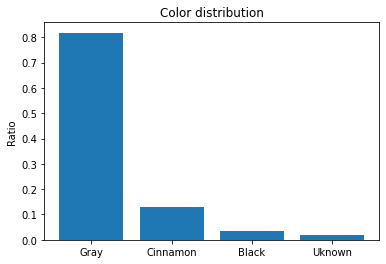

In [17]:
ratio_color=df['Primary Fur Color'].value_counts().values/len(df)
color=['Gray','Cinnamon','Black','Uknown']
plt.bar(color,ratio_color)
plt.title('Color distribution')
plt.ylabel('Ratio')
plt.show()

As we can see, most of the squirrels in Central Park are gray. In the following figures we will see in which areas of the park we can find these squirrels. To visualize the values of different features on the map, I have created the plotFeatPark function, which will paint in green those areas of the park where the feature takes a certain value.

Gray


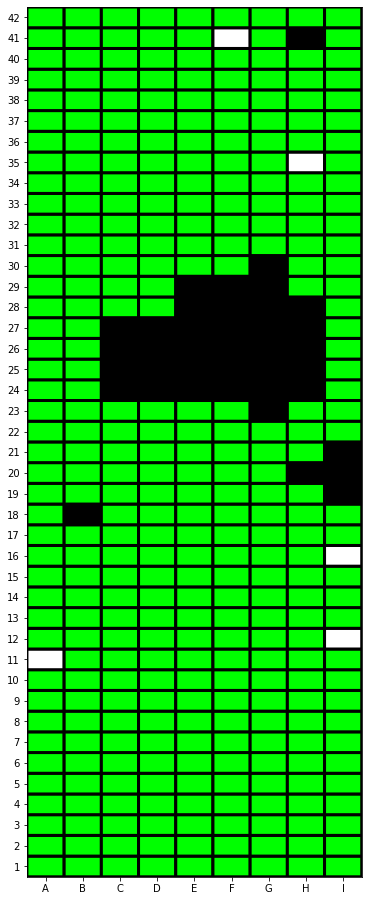

Cinnamon


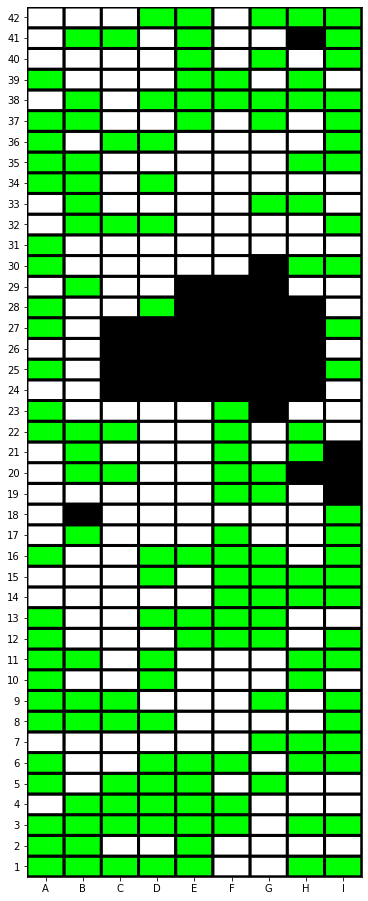

Black


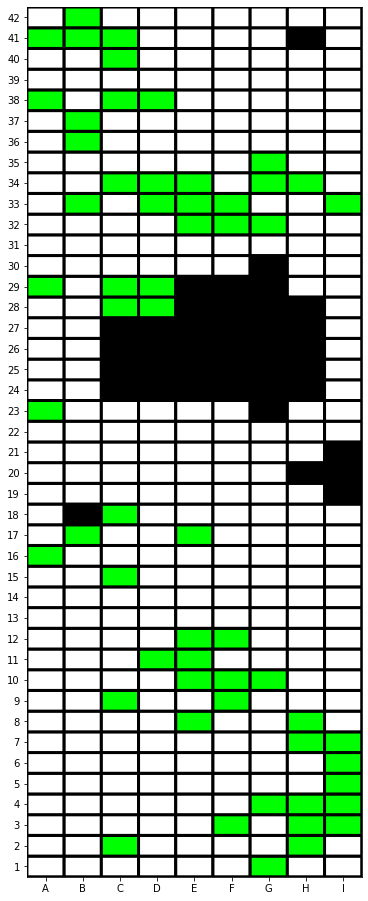

Uknown


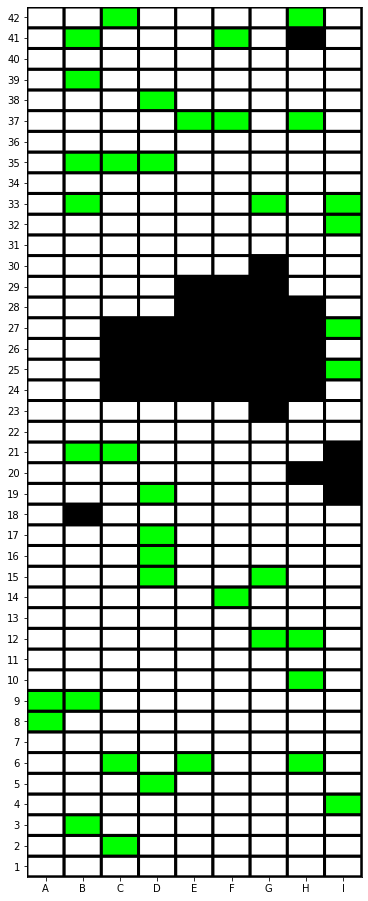

In [18]:
def plotFeatPark(df,feat,labels,NYmap):
    l_feat=df[feat].value_counts().index.tolist()
    for i in range(len(l_feat)):
        print(labels[i])
        aux=df.loc[df[feat]==l_feat[i]]
        aux.reset_index(drop=True, inplace=True)
        NYmap_f=NYmap.copy()
        for j in range(len(aux)):
            NYmap_f[aux['NS-Zone'][j]-1,aux['WE-Zone'][j]]=2

        cmap = colors.ListedColormap(['black','white','lime'])
        plt.figure(figsize=(6,16))
        plt.pcolor(NYmap_f,cmap=cmap,edgecolors='k', linewidths=3)
        plt.xticks(np.arange(0.5,len(WEcoords)+0.5,step=1),WEcoords)
        plt.yticks(np.arange(0.5,len(NScoords)+0.5,step=1),NScoords)
        plt.show()

plotFeatPark(df,'Primary Fur Color',color,NYmap)

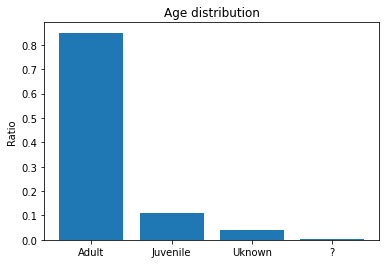

In [19]:
ratio_age=df['Age'].value_counts().values/len(df)
age=['Adult','Juvenile','Uknown','?']
plt.bar(age,ratio_age)
plt.title('Age distribution')
plt.ylabel('Ratio')
plt.show()

Because the short juvenile stage of squirrels, most of the squirrels observed are adults. Since in the data we had observations with missing values for 'Age' and values of '?', we now have 2 different unknown values. The distribution of these 4 classes on the map is as follows:

Adult


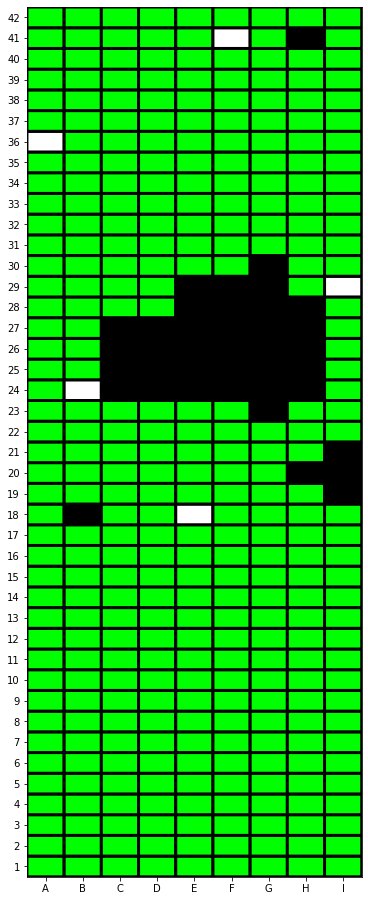

Juvenile


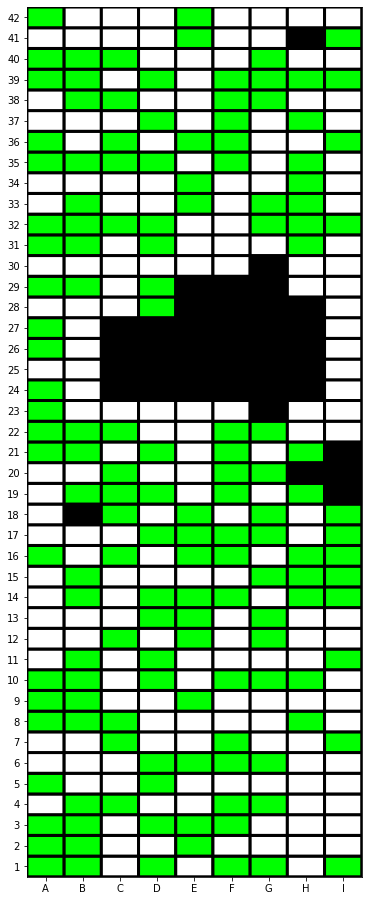

Uknown


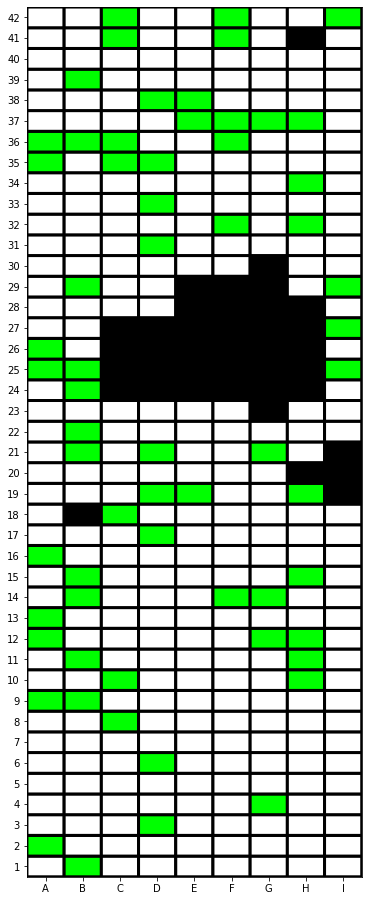

?


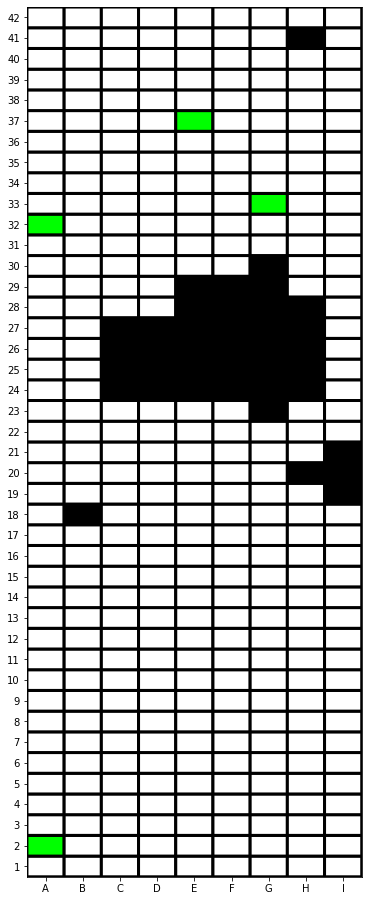

In [20]:
plotFeatPark(df,'Age',age,NYmap)

Finally, we are going to see what proportion of adult and juvenile squirrels there are of each color.

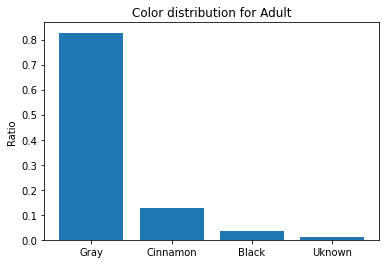

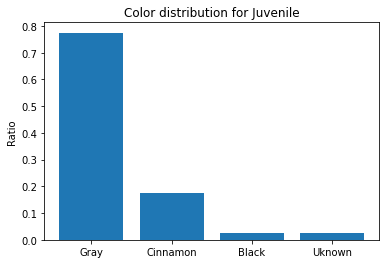

In [21]:
indx=df['Age'].value_counts().index.tolist()
for i in range(2):
    aux=df.loc[df['Age']==indx[i]]
    ratio_color=aux['Primary Fur Color'].value_counts().values/len(aux)
    plt.bar(color,ratio_color)
    plt.title('Color distribution for '+age[i])
    plt.ylabel('Ratio')
    plt.show()

We can see that although the distributions are similar, the ratios for gray and black squirrels decrease slightly for the new generation of squirrels in favor of the cinnamon ones.

# Sociological information

In this section we will show how squirrels are distributed in different group sizes, what kind of activities they are usually seen doing, how they communicate with each other and how they interact with humans.

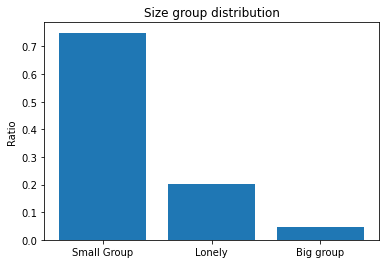

In [22]:
ratio_group=df['Squirrel Group Size'].value_counts().values/len(df)
group=['Small Group','Lonely','Big group']
plt.bar(group,ratio_group)
plt.title('Size group distribution')
plt.ylabel('Ratio')
plt.show()

It can be seen that squirrels are usually observed in small groups. However, if we look at the distribution of the three group sizes on the following maps, we can see that lonely squirrels are completely distributed across the map, while as the group increases, their observation throughout the map is reduced.

Small Group


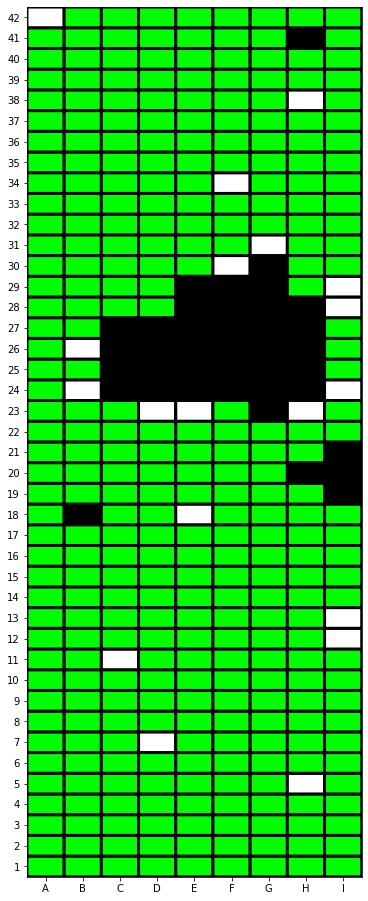

Lonely


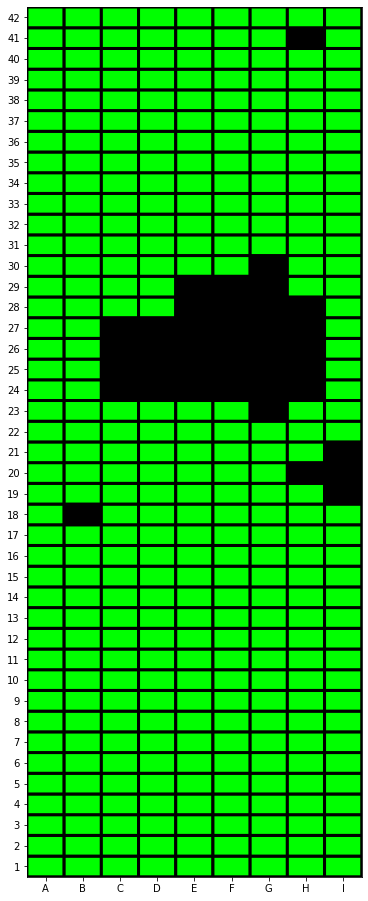

Big group


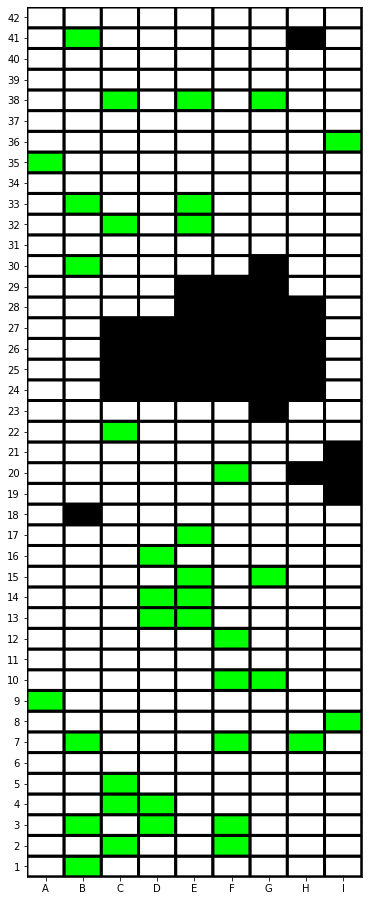

In [23]:
plotFeatPark(df,'Squirrel Group Size',group,NYmap)

Next, we are going to observe what activities squirrels usually do.

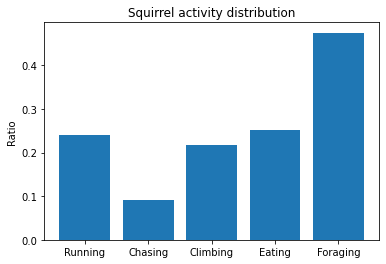

In [24]:
N=len(df)
ratio_runnig=len(df.loc[df['Running']==1])/N
ratio_chasing=len(df.loc[df['Chasing']==1])/N
ratio_climbing=len(df.loc[df['Climbing']==1])/N
ratio_eating=len(df.loc[df['Eating']==1])/N
ratio_foraging=len(df.loc[df['Foraging']==1])/N

plt.bar(['Running','Chasing','Climbing','Eating','Foraging'],[ratio_runnig,ratio_chasing,ratio_climbing,
                                                              ratio_eating,ratio_foraging])
plt.title('Squirrel activity distribution')
plt.ylabel('Ratio')
plt.show()

The main activity is the search for food. However, the distribution exceeds 100%, so we are going to visualize how many activities they can do simultaneously.

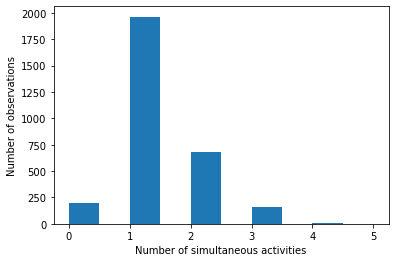

In [25]:
sim_activ=df['Running'].astype(int)+df['Chasing'].astype(int)+df['Climbing'].astype(int)+df['Eating'].astype(int)+df['Foraging'].astype(int)
plt.hist(sim_activ)
plt.xlabel('Number of simultaneous activities')
plt.ylabel('Number of observations')
plt.show()

As we can see, the squirrels are capable of doing up to 4 activities at the same time, although there are surely those cases in which there is more than one squirrel in the area.

In the following figure, we can see the type of verbal communication that squirrels have with each other. This verbal comunication is generaly kuks, since the danger signals (quaas/moans) are obviously less frequent.

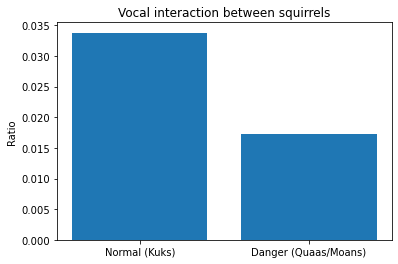

In [26]:
ratio_peace=len(df.loc[df['Kuks']==True])/N
ratio_danger=len(df.loc[(df['Quaas']==True)|(df['Moans']==True)])/N

plt.bar(['Normal (Kuks)','Danger (Quaas/Moans)'],[ratio_peace,ratio_danger])
plt.title('Vocal interaction between squirrels')
plt.ylabel('Ratio')
plt.show()

However, if we observe how these verbal communications are distributed on the map, we can see how moans have been observed in very few places (probably because it is easier for a squirrel to find a dog in the park than a hawk).

Kuks


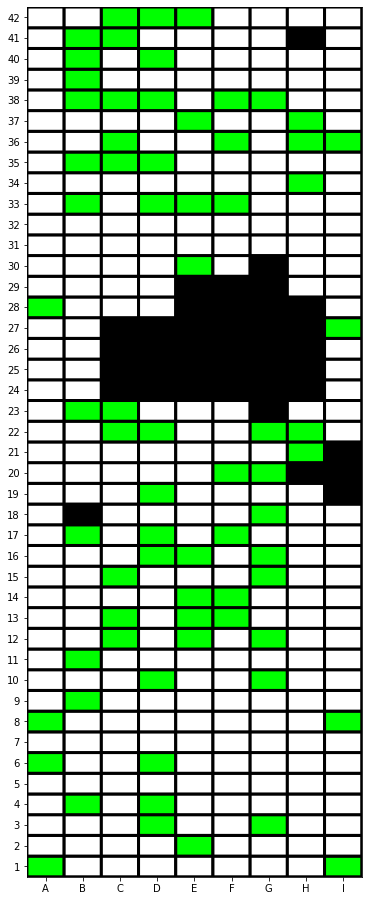

Quaas


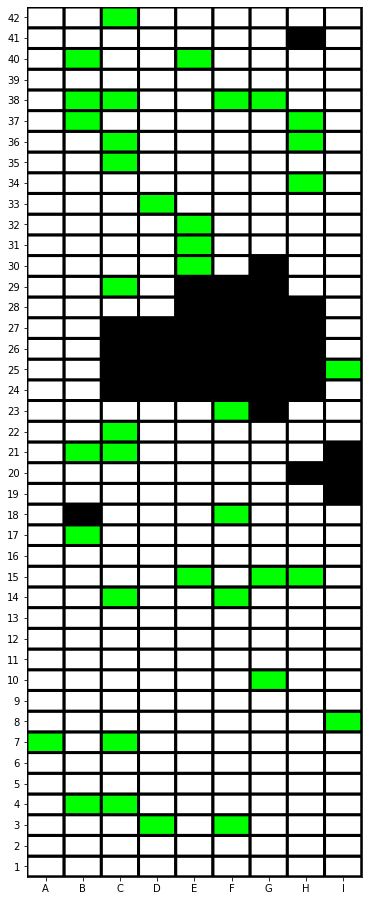

Moans


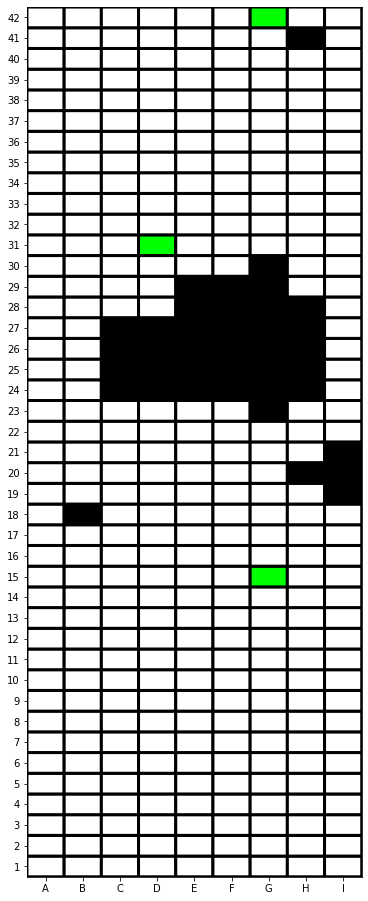

In [27]:
def plotBoolFeatsPark(df,l_feat,NYmap):
    for i in range(len(l_feat)):
        print(l_feat[i])
        aux=df.loc[df[l_feat[i]]==True]
        aux.reset_index(drop=True, inplace=True)
        NYmap_f=NYmap.copy()
        for j in range(len(aux)):
            NYmap_f[aux['NS-Zone'][j]-1,aux['WE-Zone'][j]]=2

        cmap = colors.ListedColormap(['black','white','lime'])
        plt.figure(figsize=(6,16))
        plt.pcolor(NYmap_f,cmap=cmap,edgecolors='k', linewidths=3)
        plt.xticks(np.arange(0.5,len(WEcoords)+0.5,step=1),WEcoords)
        plt.yticks(np.arange(0.5,len(NScoords)+0.5,step=1),NScoords)
        plt.show()

plotBoolFeatsPark(df,['Kuks','Quaas','Moans'],NYmap)

As well as verbal communication, squirrels also have non-verbal communication through their tail, with which they can show their mood (interested or scared).

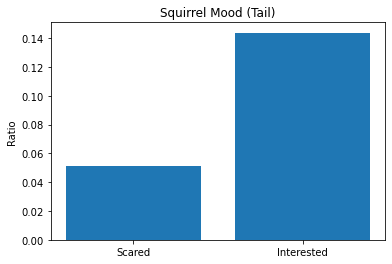

In [28]:
ratio_tAlert=len(df.loc[df['Tail flags']==True])/N
ratio_tInterest=len(df.loc[df['Tail twitches']==True])/N

plt.bar(['Scared','Interested'],[ratio_tAlert,ratio_tInterest])
plt.title('Squirrel Mood (Tail)')
plt.ylabel('Ratio')
plt.show()

The squirrels seem to show more interest than fear in things. However, the distribution of this non-verbal communication does not have a specific distribution on the map.

Tail flags


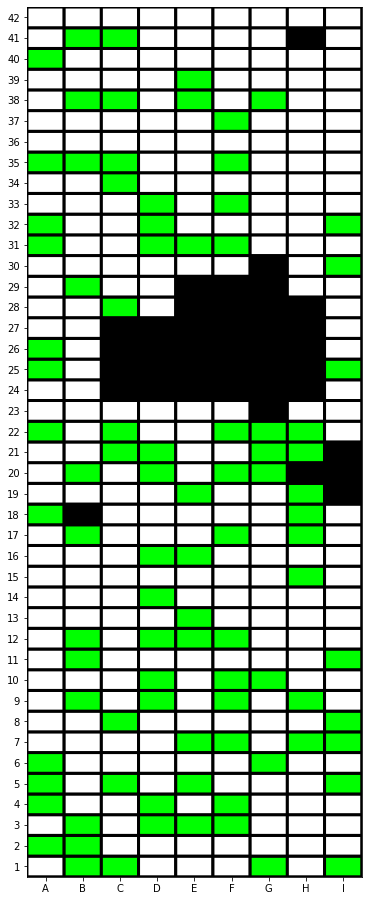

Tail twitches


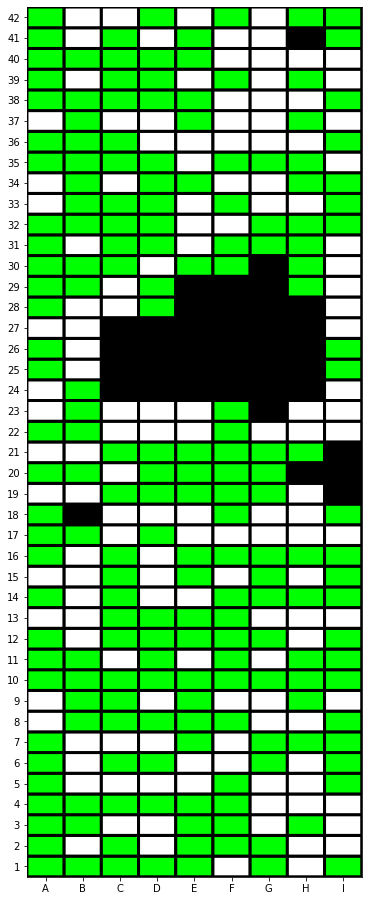

In [29]:
plotBoolFeatsPark(df,['Tail flags','Tail twitches'],NYmap)

Finally, it remains to be seen what the interaction of squirrels with humans is.

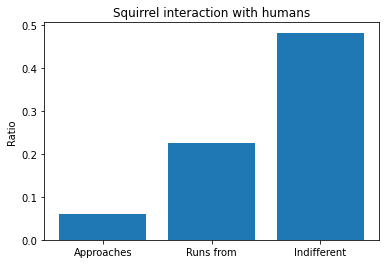

In [30]:
ratio_approach=len(df.loc[df['Approaches']==True])/N
ratio_run=len(df.loc[df['Runs from']==True])/N
ratio_indifferent=len(df.loc[df['Indifferent']==True])/N

plt.bar(['Approaches','Runs from','Indifferent'],[ratio_approach,ratio_run,ratio_indifferent])
plt.title('Squirrel interaction with humans')
plt.ylabel('Ratio')
plt.show()

From what we can see, the reaction of the squirrels to us is usually indifference, followed by fear, being the occasions in which they approach us few. The distribution of these interactions on the map does not provide additional information, we can only note that the more infrequent an interaction is in the fewer zones it is observed.

Approaches


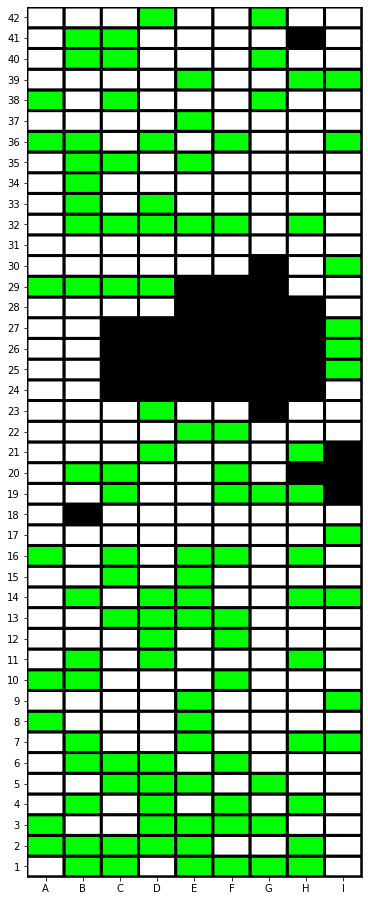

Indifferent


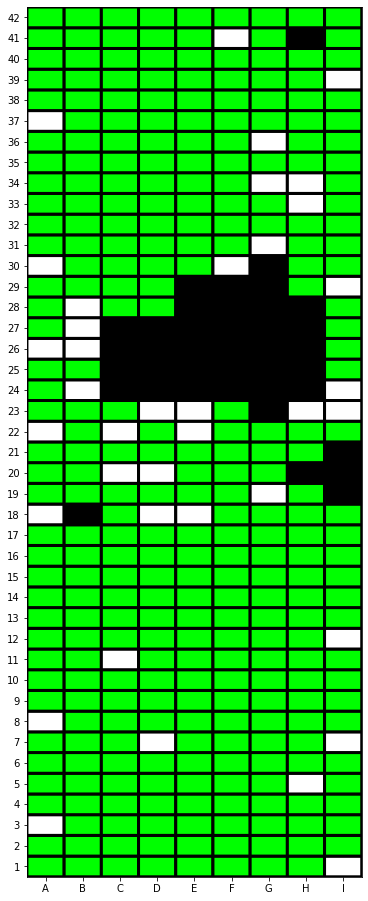

Runs from


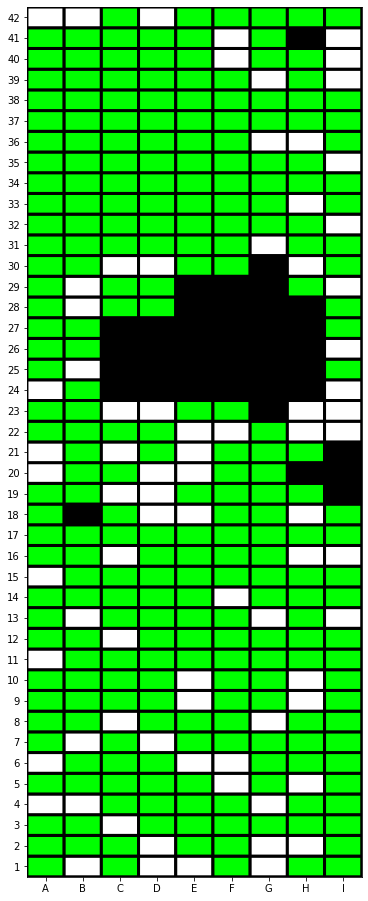

In [31]:
plotBoolFeatsPark(df,['Approaches','Indifferent','Runs from'],NYmap)

# Squirrel clustering

Once the exploration and analysis of the data is done, we will try to cluster the squirrels into different groups. For this we are going to remove a series of features that we consider unnecessary for this task. These are the features related to place (NS-Zone, WE-Zone, Location) and time (Shift, Day). If we want to group the squirrels by their behavior, we must focus on the Boolean features related to these aspects, as well as factors such as the species, age and size of the group, that can be related to a certain behavioir. Howerever, features such as the coordinates where the squirrels are found, can alter the clustering because of their greater variability, although this variability is misleading given the small size of the park.

In [32]:
df.drop(columns=['NS-Zone', 'WE-Zone', 'Location', 'Shift', 'Day'], inplace=True)

In order to visualize the clusters and project their information so that it is more separable, we have used the UMAP dimensionality reduction method.

In [33]:
reducer_num=umap.UMAP(random_state=42)
X=reducer_num.fit_transform(df)

For the clustering of the squirrels it is first necessary to find the best number of clusters. We can obtain this number through 2 methods: the elbow method and the Silhouette method. For the elbow method, we calculate the sum of squared distance between each point and the centroid in a cluster (WCSS) for different numbers of clusters. The objective of this method is to find the number of clusters that causes the inflection point (elbow) in the descending curve of WCSS values. In the case of Silhouette, we also calculate its coefficient for different numbers of clusters. This coefficient is a measure of how similar an instance is to its own cluster (cohesion) compared to other clusters (separation). The best number of clusters will be the one that obtains a higher coefficient.

In [34]:
def Silhouette_Nclusters_Detection(data,Nc):
    Smax=0
    wcss=[]
    for n_clusters in range(2,Nc):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=300)
        kmeans.fit(data)
        cluster_labels = kmeans.predict(data)
        wcss.append(kmeans.inertia_)

        # Silhouette_score
        silhouette_avg = silhouette_score(data, cluster_labels)
        if silhouette_avg>Smax:
            Smax=silhouette_avg
            #Save Number of clusters
            Ncluster = n_clusters

    return Ncluster,wcss

Nc=20
Ncluster,wcss=Silhouette_Nclusters_Detection(X,Nc)
print('The best number of clusters obtained by Silhouette is '+str(Ncluster))

The best number of clusters obtained by Silhouette is 5


Once the best number of clusters has been calculated using Silhouette, we are going to visualize the elbow curve.

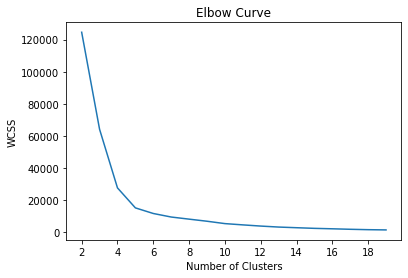

In [35]:
plt.plot(np.arange(2,Nc),wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(2,Nc,2))
plt.show()

We can see that for 5 clusters the elbow curve also reaches its inflection point, so both methods agree on said value.

We proceed to cluster the data and visualize the clusters.

[]

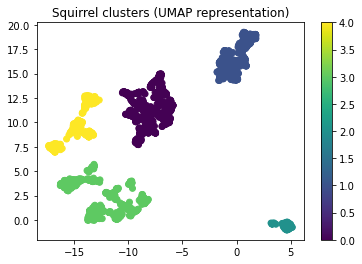

In [36]:
clustering = KMeans(n_clusters=Ncluster).fit(X)
cluster=clustering.labels_

plt.scatter(X[:,0],X[:,1],c=cluster)
plt.colorbar()
plt.title('Squirrel clusters (UMAP representation)')
plt.plot()

We can verify that the clusters are quite defined and cohesive.

Once the clustering of the data is done, it is necessary to visualize the characteristics that make each cluster unique. For this we are going to train a classifier to identify the cluster of each squirrel and later we will extract the SHAP values of each cluster. These SHAP values show the impact of having a certain value for a given feature in comparison to the prediction we would make if that feature took some baseline value.

A classifier that performs well for this problem is XGBoost, an ensemble classifier of random forests. In order to improve its performance, we perform a search for hyperparameters using GridSearchCV (5-cross-validation) and we will obtain the best accuracy obtained for the validation sets. This accuracy rate will help us estimate if the classifier has correctly learned the data used and since our objective will not be to classify future new data, we will not use a test set on this occasion. Because there is an imbalance in the data regarding the number of instances per cluster, we apply the SMOTEENN balancing method (a combined method of over and under sampling that uses SMOTE and Edited Nearest Neighbours) only on the training set by means of a Pipeline, to avoid manipulating the validation set.

In [37]:
parameters={'class__max_depth': [5, 10, 50, 100, None],
            'class__n_estimators': range(300, 1000, 100)}

model = Pipeline([('sampling', SMOTEENN()), ('class', XGBClassifier())])
clf=GridSearchCV(model, parameters, cv=5, scoring='accuracy', n_jobs = -1)

clf.fit(df,cluster)
print('Accuracy:'+str(round(clf.best_score_*100.0,3))+'%')

Accuracy:99.006%


Once we see that the classifier has a good performance, we proceed to extract the SHAP values of each cluster.

Cluster 0


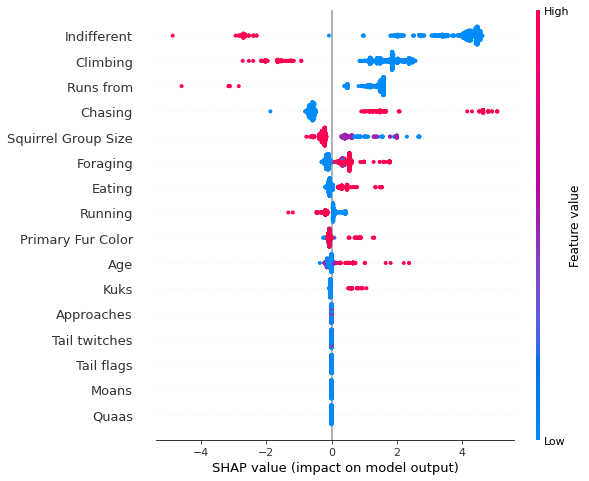

Cluster 1


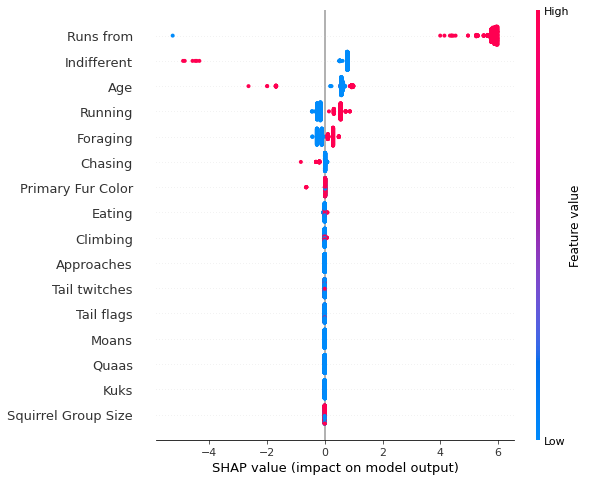

Cluster 2


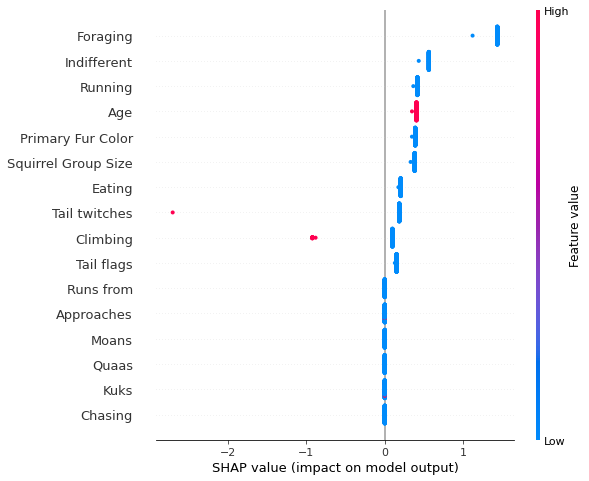

Cluster 3


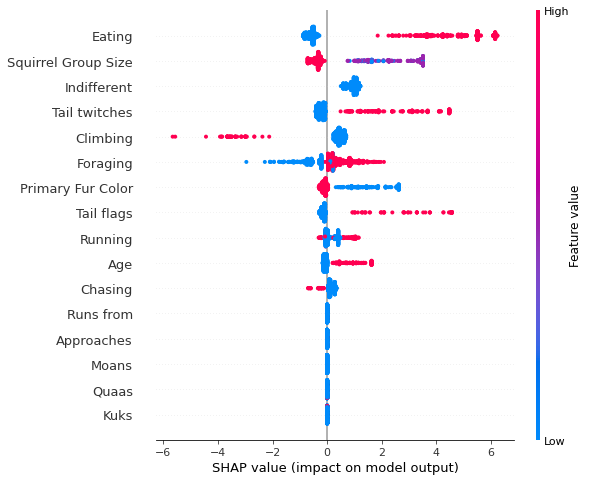

Cluster 4


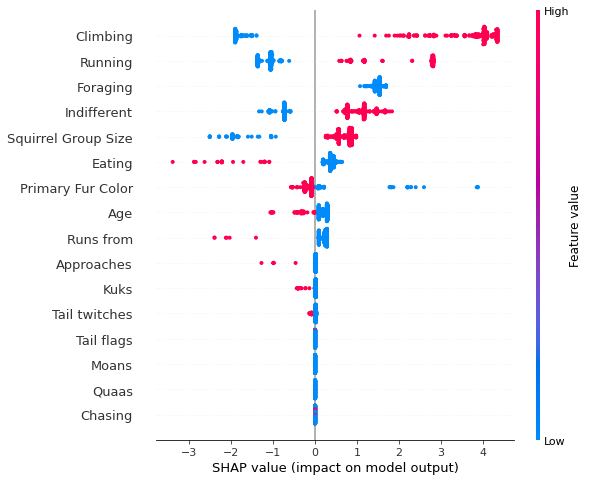

In [38]:
explainer=shap.TreeExplainer(clf.best_estimator_['class'])
df_cluster=df.copy()
df_cluster.insert(0,'Cluster',cluster)
for i in range(Ncluster):
    print('Cluster '+str(i))
    aux=df_cluster.loc[df_cluster['Cluster']==i].drop(['Cluster'],axis=1)
    shap.values=explainer.shap_values(aux)
    shap.summary_plot(shap.values[i],aux)

Some information that emerges from each cluster is as follows:
- Cluster 0 squirrels are the ones that chase other squirrels.
- Cluster 1 squirrels are the ones that run from humans.
- Cluster 2 squirrels are the juveniles.
- Cluster 3 squirrels are the feasts.
- Cluster 4 squirrels are the climbers and runners.

# Classification of squirrels regarding interaction with humans

We are going to analyze if we can extract a relationship between the positive and negative interactions of the squirrels and what factors are involved. For this purpose, we are going to keep only those instances that have the 'Approaches' or 'Run from' feature as true, eliminating those instances that have both features as true (since they give us contradictory information). After completing this process, each feature contains the opposite information to the other, so we remove 'Run from' and rename 'Approaches' as 'Friendly'.

In [39]:
df_friend=df.loc[(df['Approaches']==True)|(df['Runs from']==True)].copy()
ids_nosense=df_friend.index[(df_friend['Approaches']==True)&(df_friend['Runs from']==True)]
df_friend.drop(ids_nosense, inplace=True)
df_friend.drop(columns=['Runs from'], inplace=True)
df_friend.rename(columns={'Approaches':'Friendly'}, inplace=True)

We are going to train a classifier to be able to identify the 'Friendly' class. In this case, we used the Random Forest classifier, since it obtained a slightly better performance in preliminary tests. As we did in the last section, we perform a hyperparameter search and a balance of both classes (friendly, not friendly).

In [40]:
parameters={'class__max_depth': [5, 10, 50, 100, None],
            'class__n_estimators': range(300, 1000, 100)}

model = Pipeline([('sampling', SMOTEENN()), ('class', RandomForestClassifier())])
clf=GridSearchCV(model, parameters, cv=5, scoring='accuracy', n_jobs = -1)

clf.fit(df_friend.drop(['Friendly'],axis=1),df_friend['Friendly'])
print(clf.best_score_*100.0)

77.26955994849656


We are clearly facing a more complex problem than identifying the cluster of each squirrel, however the accuracy rate is reasonably good, so we are going to see what information the SHAP values of each class provide us.

Friendly: False


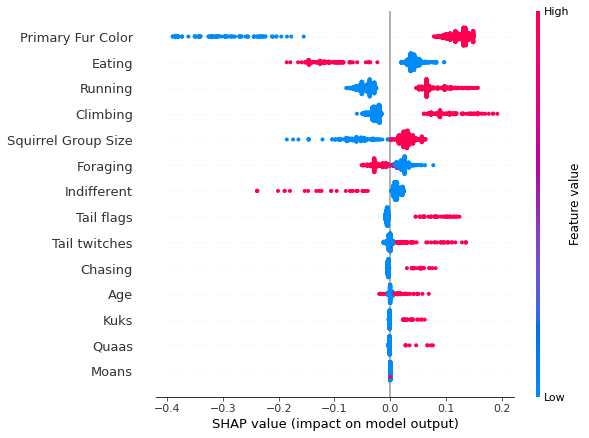

Friendly: True


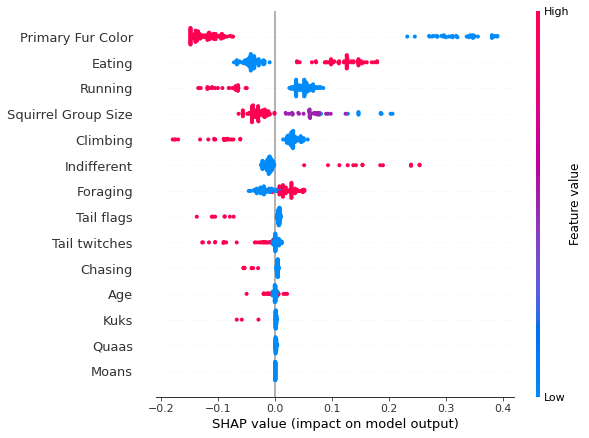

In [41]:
explainer=shap.TreeExplainer(clf.best_estimator_['class'])
for i in range(2):
    print('Friendly: '+str(bool(i)))
    aux=df_friend.loc[df_friend['Friendly']==i].drop(['Friendly'],axis=1)
    shap.values=explainer.shap_values(aux)
    shap.summary_plot(shap.values[i],aux)

We note that the unfriendly squirrels are apparently the gray ones and those that are running or climbing, do not foraging for food or eat and show fear through their tail. While the friendly squirrels are the black and the cinnamon ones that do just the opposite actions.

# Conclusions

First, we have done an exploration and analysis of the data, we extracted from this process information on the observations of squirrels made, the demography of the squirrels and their sociological behavior between them and humans. For the squirrel clustering, we have focused mainly on the behavior of the squirrels, which is why most of the clusters obtained focused on these features. We can affirm that there are organized groups of squirrels and they are based on the activities they do. Finally, as for the factors that influence their friendship towards humans, we highlight the black and cinnamon squirrels and the fact that they are hungry, so we must not forget to take nuts to the park if what we want is their company.